## 0. Simulate phone dataset 

We want to simulate data $(x,y)$ to represent cost for phone subscriptions, with: 

- $x$ - called minutes per month
- $y$ - SEK per month 

&nbsp; a) Use ```numpy.random.normal()``` to simulate a dataset with the following requirements:
- set a seed to 42 (for reproducibility and reference)
- simulate 400 x-values from the r.v. $X \sim \mathcal{N}(100, 100)$ 
- take absolute value of these x-values
- simulate noise 400 noise values from r.v. $\epsilon \sim \mathcal{N(0, 50)}$ 
- Let $y = 2x+25+\epsilon$
- plot the data set 






(400,) (400,)
 Number of calls more than 300 min 11
Minumum number of costs 8


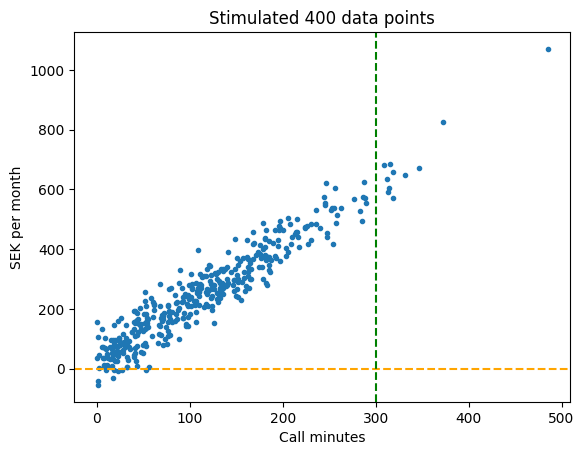

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(42)
samples = 400

X = np.random.normal(100,100,samples)
x = abs(X)
epsilon = np.random.normal(0,50, samples)
print(epsilon.shape, x.shape)

y = 2*x + 25 +epsilon

fig, ax = plt.figure(), plt.axes()
ax.plot(x,y, '.')
ax.axhline(y= 0, color ="orange",linestyle="--")
ax.axvline(x = 300, color ="green",linestyle="--")

ax.set(xlabel = "Call minutes", ylabel = "SEK per month", title ="Stimulated 400 data points")

print(" Number of calls more than 300 min",len(x[x >= 300]))
print("Minumum number of costs",len(y[y < 0]))




&nbsp; b) Now we want to remove some outliers according to this assumption: 
- no one talks more than 300 min using this type of subscription
- no ones costs can be negative
- plot the new dataset
- also plot ground truth using the true parameters $\beta_0 = 25, \beta_1 = 2$


In [58]:

df = pd.DataFrame({'minutes': x, 'cost':y})
df.head()


,minutes,cost
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


In [60]:
df_new = df.query("`minutes` <= 300 and `cost`> 0")
df_new.head()

,minutes,cost
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


[Text(0.5, 0, 'Call minutes'),
 Text(0, 0.5, 'SEK per month'),
 Text(0.5, 1.0, 'Cleaned Outliners'),
 None]

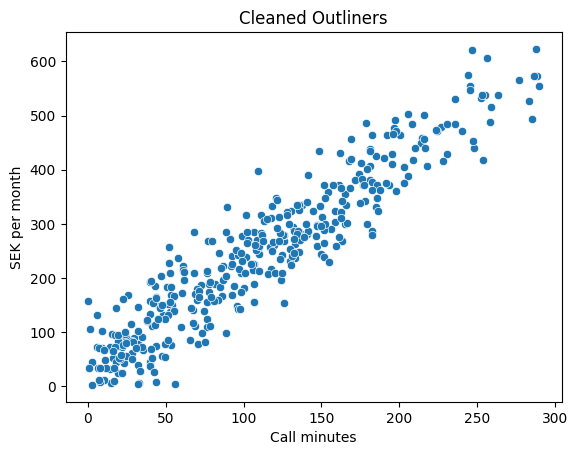

In [73]:
ax = sns.scatterplot(data = df_new, x ='minutes', y = 'cost' )
ax.set(xlabel = "Call minutes", ylabel = "SEK per month", title ="Cleaned Outliners")





&nbsp; c) Insert the values into a DataFrame 

In [63]:

df = pd.DataFrame({'minutes': x, 'cost':y})
df.head()

,minutes,cost
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051
